In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta

In [47]:
spend = pd.read_csv('C:/Users/Lenovo/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/spend.csv')

In [48]:
repayment = pd.read_csv('C:/Users/Lenovo/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/Repayment.csv')

In [49]:
customer = pd.read_csv('C:/Users/Lenovo/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')

In [9]:
customer.head(100)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [50]:
spend



,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [51]:
repayment.isnull().sum()
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


mean_original = customer["Age"].mean()

In [52]:
repayment['Unnamed: 4'].unique()

array([nan])

In [53]:
repayment['SL No:'].unique()

array([  nan,    2.,    3., ..., 1498., 1499., 1500.])

In [54]:
repayment.drop(columns ={'Unnamed: 4','SL No:'},inplace = True)
repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1518,NaN,NaN,NaN
1519,NaN,NaN,NaN
1520,NaN,NaN,NaN
1521,NaN,NaN,NaN


In [15]:
repayment.tail(25)

,Customer,Month,Amount
1498,A70,12-Aug-05,454016.51
1499,A71,13-Sep-04,56286.33
1500,NaN,NaN,NaN
1501,NaN,NaN,NaN
1502,NaN,NaN,NaN
1503,NaN,NaN,NaN
1504,NaN,NaN,NaN
1505,NaN,NaN,NaN
1506,NaN,NaN,NaN
1507,NaN,NaN,NaN


In [55]:
repayment.dropna(axis = 0,inplace = True)
repayment.tail()

,Customer,Month,Amount
1495,A67,9-May-05,55638.77
1496,A68,10-May-06,319836.49
1497,A69,11-Jul-06,247628.45
1498,A70,12-Aug-05,454016.51
1499,A71,13-Sep-04,56286.33


In [56]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 46.9+ KB


In [57]:
repayment['Month'] = repayment['Month'].apply(lambda x: pd.to_datetime(x))
repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB


In [58]:
spend['Month'] = spend['Month'].apply(lambda x:pd.to_datetime(x))
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73
1496,1497,A68,2006-03-25,BUS TICKET,204971.10
1497,1498,A69,2006-03-31,BUS TICKET,50449.44
1498,1499,A70,2006-03-23,BUS TICKET,80593.94


In [59]:
spend.drop(columns = {'Sl No:'},inplace =True)

In [52]:
spend

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73
1496,A68,2006-03-25,BUS TICKET,204971.10
1497,A69,2006-03-31,BUS TICKET,50449.44
1498,A70,2006-03-23,BUS TICKET,80593.94


In [56]:
customer

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [60]:
customer.drop(columns = {'No'},inplace = True)

In [60]:
customer

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [61]:
## 1. In the above dataset, a. In case age is less than 18, replace it with mean of age values.
mean_age = customer['Age'].mean()


In [62]:
## Ques 1a
customer.loc[(customer['Age'] < 18),'Age']=mean_age

In [63]:
customer_spend = pd.merge(customer,spend,on ='Customer')
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [64]:
## Ques 1b  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)
customer_spend[customer_spend['Amount'] > customer_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-09-03,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,2006-03-30,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [65]:
## Ques_1b
customer_spend['Amount'] = np.where((customer_spend['Amount'] > customer_spend['Limit']),customer_spend['Limit']/2,customer_spend['Amount'])

In [ ]:
## Ques 1c  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [120]:
repayment

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88
...,...,...,...
1495,A67,2005-05-09,55638.77
1496,A68,2006-05-10,319836.49
1497,A69,2006-07-11,247628.45
1498,A70,2005-08-12,454016.51


In [66]:
customer_repayment = pd.merge(customer,repayment,on = 'Customer')
customer_repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73


In [67]:
customer_repayment.rename(columns = {'Amount':'Repayment_Amount'},inplace = True)

In [68]:
## Ques_1c
customer_repayment['Repayment_Amount'] = np.where((customer_repayment['Repayment_Amount'] > customer_repayment['Limit']),customer_repayment['Limit'],customer_repayment['Repayment_Amount'])

In [69]:
## Ques_2a How many distinct customers exist?
customer['Customer'].duplicated().count()


100

In [70]:
customer['Customer'].nunique()

100

In [71]:
## Ques_2b. How many distinct categories exist?
customer['Product'].drop_duplicates()

0        Gold
1      Silver
2    Platimum
Name: Product, dtype: object

In [72]:
customer['Product'].nunique()
customer_spend


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00


In [73]:
## Ques_2c. What is the average monthly spend by customers?
customer_spend['Month'].apply(lambda x:pd.to_datetime(x))
customer_spend['Month_number'] = customer_spend['Month'].apply(lambda x: x.month)

In [74]:
customer_spend.groupby(['Month_number','Customer'])[['Amount']].mean()

Amount
Month_number Customer               
1            A1        372762.587143
             A10       161144.326667
             A100       50000.000000
             A11       130298.903333
             A12       343885.410000
...                              ...
12           A54       155708.160000
             A56       223628.270000
             A58        50001.000000
             A61        62914.030000
             A64       393513.710000

[578 rows x 1 columns]

In [75]:
## Ques_2d What is the average monthly repayment by customers?
customer_repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer          1500 non-null   object        
 1   Age               1500 non-null   float64       
 2   City              1500 non-null   object        
 3   Product           1500 non-null   object        
 4   Limit             1500 non-null   float64       
 5   Company           1500 non-null   object        
 6   Segment           1500 non-null   object        
 7   Month             1500 non-null   datetime64[ns]
 8   Repayment_Amount  1500 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 117.2+ KB


In [76]:
customer_repayment['Month_number'] = customer_repayment['Month'].apply(lambda x:x.month)
customer_repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_Amount,Month_number
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,1
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,1
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,1
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,1
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,1
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00,1
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,1
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,1
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,1


In [77]:
customer_repayment.groupby(['Month_number','Customer'])[['Repayment_Amount']].mean()

Repayment_Amount
Month_number Customer                  
1            A1           343972.327143
             A10          272897.385000
             A100          69551.190000
             A11          319518.796667
             A12          203397.863333
...                                 ...
12           A56          162103.090000
             A57          100001.000000
             A6            27398.180000
             A64          212614.480000
             A7           100001.000000

[558 rows x 1 columns]

In [118]:
## repayment["Month"]=repayment["Month"].apply(lambda x:pd.to_datetime(x))
spend["Month"]=spend["Month"].apply(lambda x:pd.to_datetime(x))
spend["spend_month_wise"]=spend["Month"].apply(lambda x:x.month)
repayment["repayment_month_wise"]=repayment["Month"].apply(lambda x:x.month)

In [119]:
spend_repayment = pd.merge(left=spend,right=repayment,left_on=["Customer","spend_month_wise"],
                           right_on=["Customer","repayment_month_wise"])

In [121]:
spend_repayment["Profit"] = spend_repayment["Amount_y"] - spend_repayment["Amount_x"] 

In [122]:
spend_repayment

,Customer,Month_x,Type,Amount_x,spend_month_wise,Month_y,Amount_y,repayment_month_wise,Profit
0,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-12,495414.75,1,9943.95
1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-03,245899.02,1,-239571.78
2,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-15,259490.06,1,-225980.74
3,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-25,437555.12,1,-47915.68
4,A1,2004-01-12,JEWELLERY,485470.80,1,2005-01-17,165972.88,1,-319497.92
...,...,...,...,...,...,...,...,...,...
5311,A44,2006-12-03,JEWELLERY,313591.17,12,2005-12-03,79696.21,12,-233894.96
5312,A53,2005-04-27,JEWELLERY,129641.87,4,2006-04-02,493590.96,4,363949.09
5313,A53,2005-04-27,JEWELLERY,129641.87,4,2006-04-01,269353.50,4,139711.63
5314,A53,2005-04-27,JEWELLERY,129641.87,4,2005-04-04,339645.86,4,210003.99


In [123]:
spend_repayment["Monthly_Profit"]=np.where(spend_repayment["Amount_y"] - spend_repayment["Amount_x"]>0,(spend_repayment["Profit"]*2.9)/100,np.nan)

In [124]:
spend_repayment.sort_values('Profit',ascending=False)

,Customer,Month_x,Type,Amount_x,spend_month_wise,Month_y,Amount_y,repayment_month_wise,Profit,Monthly_Profit
5267,A36,2006-04-03,BIKE,8391.95,4,2005-04-27,495838.08,4,487446.13,14135.93777
1868,A15,2004-01-25,CAMERA,3750.13,1,2004-01-12,487671.40,1,483921.27,14033.71683
452,A26,2006-05-06,CAR,6588.51,5,2006-05-03,489138.12,5,482549.61,13993.93869
5083,A60,2004-01-25,AIR TICKET,4977.49,1,2004-01-03,487241.12,1,482263.63,13985.64527
3381,A43,2005-02-01,SHOPPING,6445.55,2,2005-02-01,484212.27,2,477766.72,13855.23488
...,...,...,...,...,...,...,...,...,...,...
3335,A40,2005-02-23,MOVIE TICKET,490796.93,2,2005-02-23,9642.77,2,-481154.16,NaN
1337,A12,2004-01-03,RENTAL,497770.15,1,2005-01-17,13379.96,1,-484390.19,NaN
2930,A41,2006-03-25,SHOPPING,490167.49,3,2004-03-19,2083.26,3,-488084.23,NaN
3546,A41,2005-11-20,BIKE,488800.78,11,2004-11-23,55.86,11,-488744.92,NaN


In [78]:
## Ques_2f  What are the top 5 product types?
Top = customer_spend['Type'].value_counts()
Top_5 = Top[:5]
Top_5

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

In [79]:
## Ques_2g  Which city is having maximum spend?
customer_spend.groupby(['City'])[['Amount']].sum().sort_values('Amount',ascending = False).head(1)

,Amount
City,
COCHIN,45963513.5


In [80]:
## Ques 2h  Which age group is spending more money?
customer_spend["Age_Group"]=np.where(((customer_spend['Age'].astype(int)>=18) & (customer_spend['Age'].astype(int)<25)),"Youth",
                                     np.where(((customer_spend['Age'].astype(int)>=25) & (customer_spend['Age'].astype(int)<45)),"Adult","Senior" ))
                                 

In [81]:
customer_spend.groupby(['Age_Group'])[['Amount']].sum()

,Amount
Age_Group,
Adult,9.339945e+07
Senior,1.117011e+08
Youth,1.468050e+07


In [82]:
## Ques_2i  Who are the top 10 customers in terms of repayment?
customer_repayment.groupby(['Customer'])[['Repayment_Amount']].sum().sort_values('Repayment_Amount',ascending = False)

,Repayment_Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
...,...
A83,10002.00
A99,10002.00
A98,10001.00


In [83]:
## Ques_3 Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.
customer_spend['Year'] = customer_spend['Month'].apply(lambda x:x.year)
customer_spend
city_data = customer_spend.groupby(['City','Product','Year'])[['Amount']].sum()


<AxesSubplot:xlabel='City,Product,Year'>

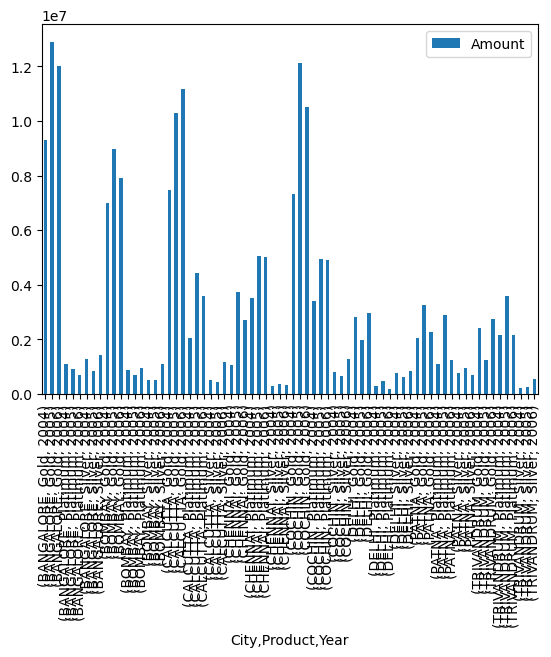

In [263]:
city_data.plot(kind = 'bar',stacked = True)

In [285]:
## Ques 4. Create graphs for a. Monthly comparison of total spends, city wise
customer_spend['Month_name'] = customer_spend['Month_number'].map({'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'})

In [85]:
customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Month_number,Age_Group,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,1,Senior,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,1,Senior,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,1,Senior,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,1,Senior,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,1,Senior,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,1,Senior,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,1,Senior,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,1,Senior,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,1,Adult,2004


In [86]:
Monthly_spend = customer_spend.pivot_table(index = ['City'],columns = ['Month_number'],values ='Amount',aggfunc ='sum')

<AxesSubplot:xlabel='City'>

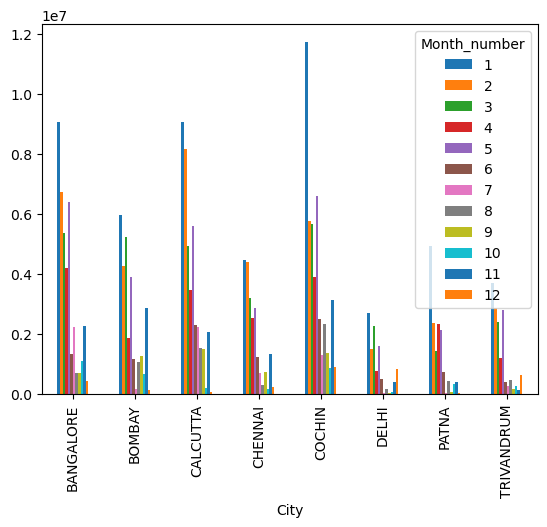

In [308]:
Monthly_spend.plot(kind='bar')

In [87]:
## Ques 4b b. Comparison of yearly spend on air tickets
Air_ticket_y_spend = pd.pivot_table(index = ['Type'],columns = 'Year',values = 'Amount',aggfunc ='sum',data = customer_spend[customer_spend['Type']=='AIR TICKET'])
Air_ticket_y_spend

Year,2004,2005,2006
Type,,,
AIR TICKET,4357225.35,10550152.21,5248469.56


<AxesSubplot:xlabel='Type'>

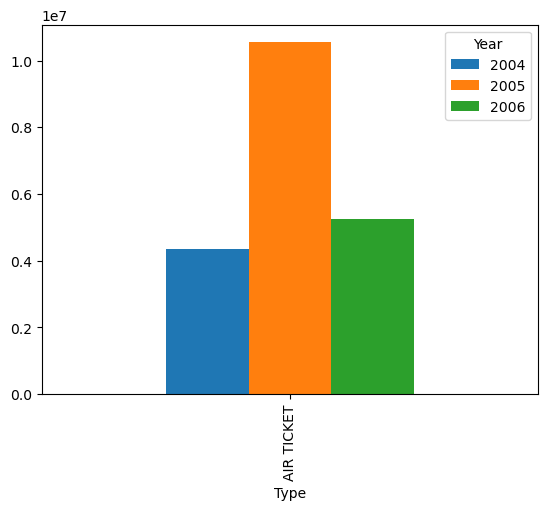

In [88]:
Air_ticket_y_spend.plot(kind = 'bar')

In [331]:
## Ques_4c c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Month_number,Age_Group,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,1,Senior,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,1,Senior,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,1,Senior,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,1,Senior,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,1,Senior,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,1,Senior,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,1,Senior,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,1,Senior,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,1,Adult,2004


In [89]:
monthly_spend = customer_spend.pivot_table(index = 'Product',columns ='Month_number',values ='Amount',aggfunc='sum')

<AxesSubplot:xlabel='Product'>

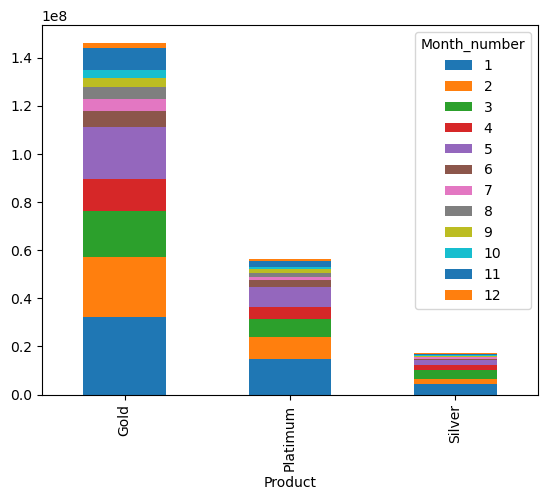

In [339]:
monthly_spend.plot(kind ='bar',stacked = True)

In [93]:
top_ten_customer=pd.pivot_table(data=customer_repayment,
                            index='Product',columns=['Month_number','City'],
                            values='Repayment_Amount',aggfunc='sum')
top_ten_customer

Month_number          1                                                   \
City           BANGALORE      BOMBAY    CALCUTTA     CHENNAI      COCHIN   
Product                                                                    
Gold          8373392.04  5495004.58  6083577.48  1283196.53  6441125.96   
Platimum       873873.76   702094.48  1879101.51  1742122.21  3569499.60   
Silver        1328028.33   900000.00   533811.62   480193.34  1249892.55   

Month_number                                              2               ...  \
City               DELHI       PATNA  TRIVANDRUM   BANGALORE      BOMBAY  ...   
Product                                                                   ...   
Gold          2758039.05  1976273.11  1034461.46  6399922.02  3307959.90  ...   
Platimum       140309.31   781731.00  1615123.57   659072.11   703918.51  ...   
Silver        1084643.62  1313626.32   500004.00  1080002.40   449817.89  ...   

Month_number         11                    12                                  \
City              PATNA TRIVANDRUM  BANGALORE    BOMBAY   CALCUTTA    CHENNAI   
Product                                                                         
Gold          255915.07        NaN  388821.96  479227.3        NaN  136860.63   
Platimum      297365.80  725146.71  110003.00  110003.0  179788.15  654763.91   
Silver        200002.00  200002.00        NaN       NaN        NaN        NaN   

Month_number                                              
City             COCHIN      DELHI      PATNA TRIVANDRUM  
Product                                                   
Gold          410935.52  292310.69  417177.67  451630.26  
Platimum      225721.14  100003.00        NaN  278687.47  
Silver        100001.00  127400.18        NaN  100001.00  

[3 rows x 93 columns]

In [101]:
customer_repayment.groupby(['City','Product','Customer','Month_number'])[['Repayment_Amount']].sum().head(10)


Repayment_Amount
City      Product Customer Month_number                  
BANGALORE Gold    A1       1                   2407806.29
                           2                    781873.80
                           4                    508949.16
                           7                    297176.74
                           9                    186427.50
                           11                   571458.18
                  A13      1                   2014186.98
                           2                   2049808.15
                           3                   1183569.05
                           4                    494392.40

In [112]:
def top_10_customer(product_name,time_period):
    return customer_repayment.loc[(customer_repayment.Product==product_name)].groupby(['Customer','City','Product',time_period])[['Repayment_Amount']].sum().sort_values('Repayment_Amount',ascending = False)

In [114]:
product_name=str(input())
time_period=str(input())

Silver
Month


In [115]:
top_10=top_10_customer(product_name,time_period)

In [116]:
top_10

,,,,Repayment_Amount
Customer,City,Product,Month,
A80,BOMBAY,Silver,2006-03-23,481205.64
A22,BOMBAY,Silver,2004-01-15,400000.00
A7,COCHIN,Silver,2004-01-15,300003.00
A57,TRIVANDRUM,Silver,2004-01-12,300003.00
A6,DELHI,Silver,2004-01-03,300000.00
...,...,...,...,...
A58,CALCUTTA,Silver,2006-05-10,2885.23
A25,COCHIN,Silver,2005-11-22,1619.24
A24,DELHI,Silver,2006-05-10,1370.84


In [113]:
customer_repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_Amount,Month_number
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,1
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,1
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,1
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,1
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,1
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00,1
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,1
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,1
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,1
